# Regularized Regression with Scikit-learn

### Import libraries

In [ ]:
%pylab inline

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split

try:
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
except ImportError:
    # use backports for sklearn 1.4
    from sklearn_backports import PolynomialFeatures
    from sklearn_backports import make_pipeline

# ignore DeprecateWarnings by sklearn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Populating the interactive namespace from numpy and matplotlib


### Generate data

In [ ]:
np.random.seed(9)

def f(x):
    return np.sin(2 * np.pi * x)
    #return np.cos(2 * np.pi * x)

# generate points used to plot
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)
print("Training Input\n",X_train,"\nTraining Ouptut\n",y_train)

Training Input
 [[0.24810117]
 [0.80373977]
 [0.79131823]
 [0.80115643]
 [0.41850818]
 [0.28929928]
 [0.87340084]
 [0.18735865]
 [0.49192894]
 [0.63805398]
 [0.43004681]
 [0.16677635]
 [0.38647717]
 [0.72908562]
 [0.34549864]
 [0.61493248]
 [0.03857092]
 [0.69773639]
 [0.34280523]
 [0.95096403]
 [0.48449846]
 [0.24311568]
 [0.89800712]
 [0.18315273]
 [0.70242742]] 
Training Ouptut
 [[ 0.5247822 ]
 [-1.32549647]
 [-1.11269052]
 [-0.66060888]
 [ 0.64070258]
 [ 0.49833001]
 [-0.87323559]
 [ 1.00478146]
 [-0.39322196]
 [-1.12824987]
 [ 0.55758057]
 [ 1.0274833 ]
 [ 0.82270457]
 [-0.62020923]
 [ 0.62941026]
 [-0.91289171]
 [ 0.06639132]
 [-1.11045547]
 [ 0.5975018 ]
 [-0.02581538]
 [ 0.56505262]
 [ 1.2641207 ]
 [-0.1874715 ]
 [ 1.24530181]
 [-0.57034256]]


### Plot data

Text(0.5, 0, 'x')

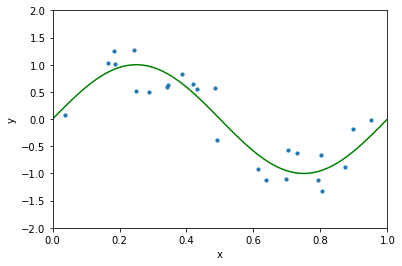

In [ ]:
ax = plt.gca()
ax.plot(x_plot, f(x_plot), color='green')
ax.scatter(X_train, y_train, s=10)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')

### Polynomial Regression with different degrees

In [ ]:
x^0, x^1, x^2

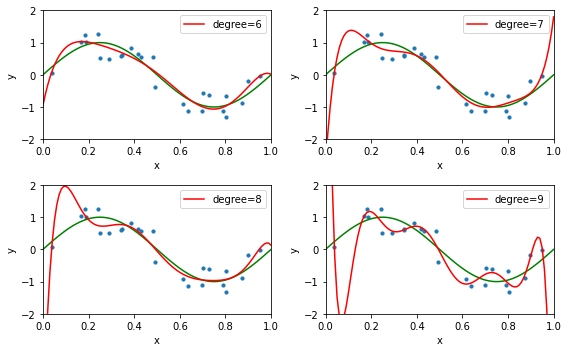

In [ ]:
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), color='green')
    ax.scatter(X_train, y_train, s=10)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')  #, fontsize='small')

fig, axes = plt.subplots(2, 2, figsize=(8, 5))
# fit different polynomials and plot approximations
for ax, degree in zip(axes.ravel(), [6, 7, 8, 9]):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    plot_approximation(est, ax, label='degree=%d' % degree)
    
plt.tight_layout()

### Degree vs Training & Testing Error

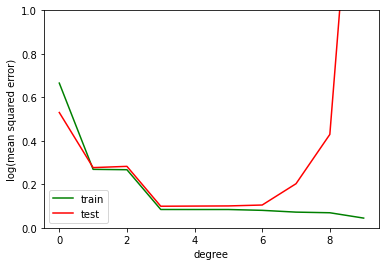

In [ ]:
from sklearn.metrics import mean_squared_error

train_error = np.empty(10)
test_error = np.empty(10)
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='lower left')

### Overfit happens as degree increase, underfit happens as degree decreases. We want the middle fit !

### Polynomial Regression with Different Regularization Strength

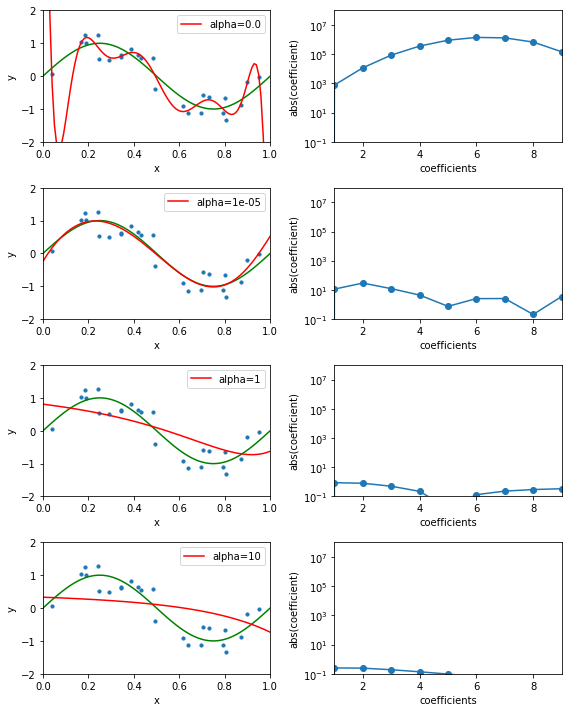

In [ ]:
fig, ax_rows = plt.subplots(4, 2, figsize=(8, 10))

def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))

degree = 9
#alphas = [0.0, 1e-8, 1e-5, 1e-1]
alphas = [0.0, 1e-5, 1, 10]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)

plt.tight_layout()